In [2]:
# 演習問題1

import pymc as pm
N = 100
p = pm.Uniform("freq_cheating", 0, 1) #カンニングの割合

true_answers = pm.Bernoulli("truths", p, size=N) #真実

first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)

@pm.deterministic
def observed_proportion(t_a=true_answers, fc=first_coin_flips, sc=second_coin_flips):
    observed = fc * t_a + (1-fc)*sc
    return observed.sum()/float(N)

In [3]:
print(observed_proportion.value)

0.6


 [-----------------100%-----------------] 40000 of 40000 complete in 12.3 secPopulating the interactive namespace from numpy and matplotlib


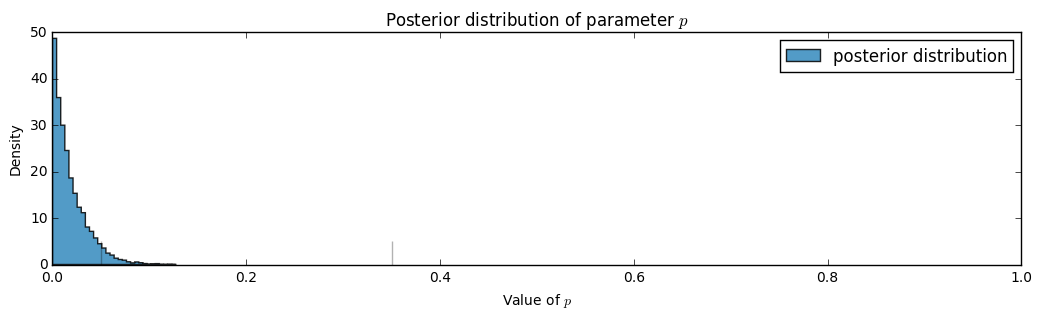

In [5]:
X = 0
observations = pm.Binomial("obs", N, observed_proportion, observed=True, value=X)

model = pm.Model([p, true_answers, first_coin_flips, second_coin_flips, observed_proportion, observations])

#以下は3章で
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

%pylab inline
figsize(12.5, 3)

p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", 
         normed=True, alpha=0.85, bins=30, color="#348ABD",
         label="posterior distribution")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)

plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior distribution of parameter $p$")
plt.legend()

 [-----------------100%-----------------] 40000 of 40000 complete in 13.3 secPopulating the interactive namespace from numpy and matplotlib


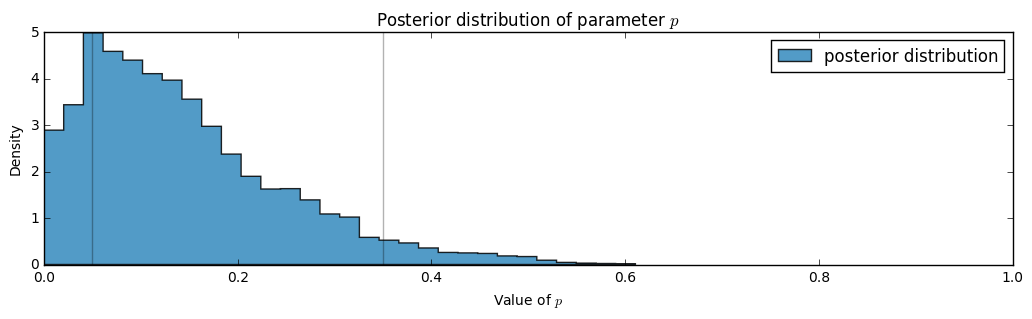

In [6]:
X = 100
observations = pm.Binomial("obs", N, observed_proportion, observed=True, value=X)

model = pm.Model([p, true_answers, first_coin_flips, second_coin_flips, observed_proportion, observations])

#以下は3章で
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

%pylab inline
figsize(12.5, 3)

p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", 
         normed=True, alpha=0.85, bins=30, color="#348ABD",
         label="posterior distribution")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)

plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior distribution of parameter $p$")
plt.legend()

In [8]:
#演習問題2

figsize(12.5, 4)
plt.scatter(alpha_samples, beta_samples, alpha=0.1, s=1)

plt.title("Why does the plot look like this")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")

NameError: name 'alpha_samples' is not defined